# Homework 5
 Write your own leapfrog scheme to calculate the orbit of two equal mass binary.
 The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
 seperated by a distance of 1 initially. Initialize the binary velocity so that
 each binary star will have an eccentricity of 0.5. Evolve this system to 100
binary orbits, and plot their orbits in the x-y plane. (Hint: both stars will drift
together first, and then being kicked at the middle step at the same time, 
and then drfit again)

First I will use the provided code in class and modify it to fit 2 masses that orbit eachother, this is quite simple and i just have to keep track of the vector algebra.

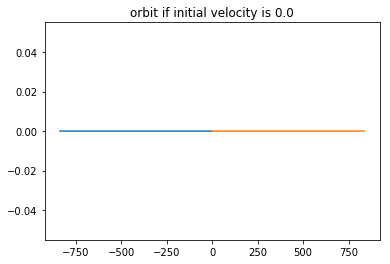

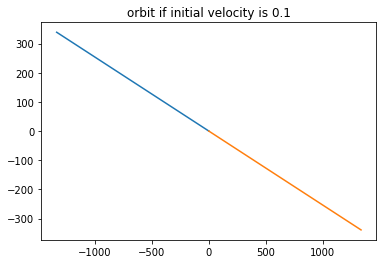

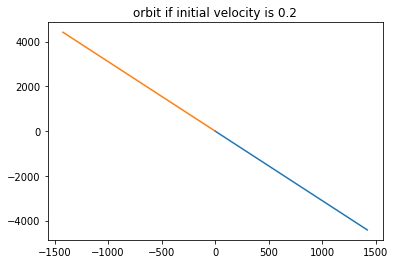

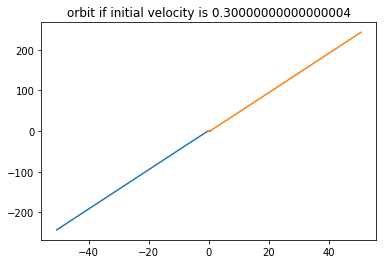

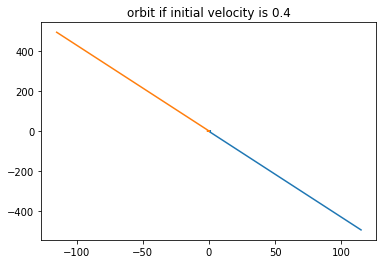

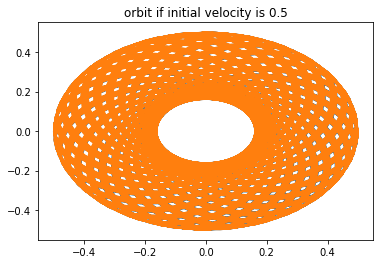

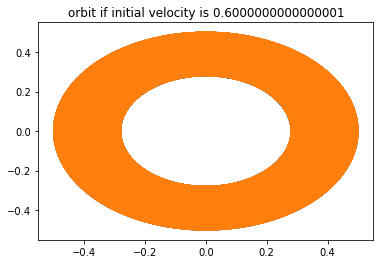

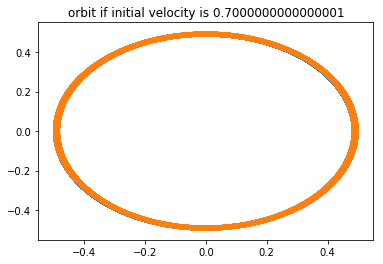

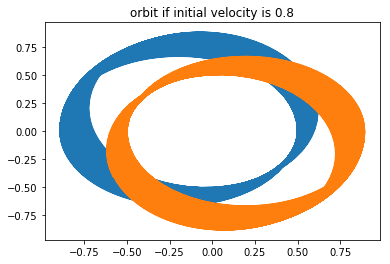

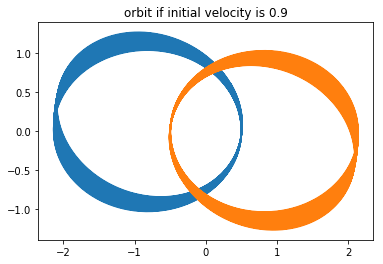

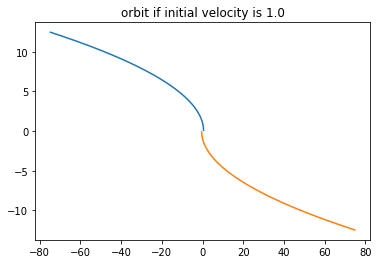

In [131]:
import numpy as np
import matplotlib.pyplot as plt

for x in np.arange(0,1.1,0.1):
    G=1.
    M1=1.
    M2 = 1.
    tend=2.*np.pi*100.
    h=0.1
    y=[0.5,0.,0.,x,-0.5,0,0,-x] #[x1,x1speed,y1,y1speed,x2,x2speed,y2,y2speed]
    t=0

    def f(t, y):
        f=np.zeros(8)
        r=np.sqrt((y[0]-y[4])*(y[0]-y[4])+(y[2]-y[6])*(y[2]-y[6]))
        f[0]=y[1]
        f[1]=G*M2/r/r/r*(y[4]-y[0])
        f[2]=y[3]
        f[3]=G*M2/r/r/r*(y[6]-y[2])
        f[4]=y[5]
        f[5]=G*M1/r/r/r*(y[0]-y[4])
        f[6]=y[7]
        f[7]=G*M1/r/r/r*(y[2]-y[6])
        return f
    
    def lf(t, h, y, n):
        # drift step
        fv=f(t, y)
        for i in [0,2,4,6]:
            y[i]+=fv[i]*h/2.
        # Please finish kick and drift step
        # kick step
        fv = f(t,y)
        for i in [1,3,5,7]:
            y[i] = y[i] + fv[i]*h
        # drift step
        fv = f(t,y)
        for i in [0,2,4,6]:
            y[i] = y[i] + fv[i]*h/2.
        return y

    x1p=[]
    y1p=[]
    x2p=[]
    y2p=[]
    ta=[]
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = lf(t,h,y,8)
        x1p=np.append(x1p,y[0])
        y1p=np.append(y1p,y[2])
        x2p=np.append(x2p,y[4])
        y2p=np.append(y2p,y[6])
        ta=np.append(ta,t)
        t = t+h

    plt.plot(x1p,y1p)
    plt.plot(x2p,y2p)
    plt.title('orbit if initial velocity is %s' %x)
    plt.show()

Now, for lack of a better method, I will narrow down the initial velocities I need and keep track of the eccentricity in order to find the correct initial velocity necessary for an eccentricity of 0.5

eccentricity is  0.2736732600198588


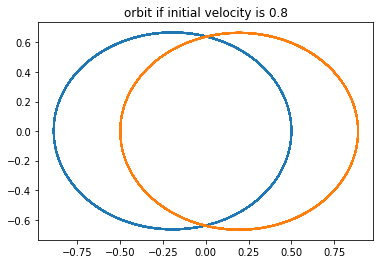

eccentricity is  0.3067842761464743


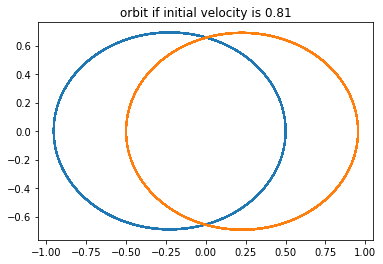

eccentricity is  0.34018295068875193


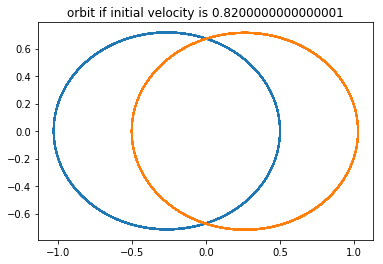

eccentricity is  0.373832664419801


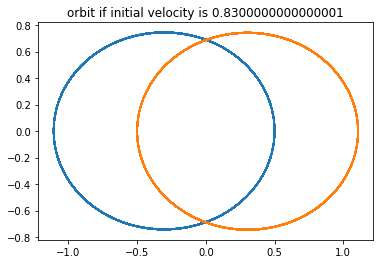

eccentricity is  0.4078600006744169


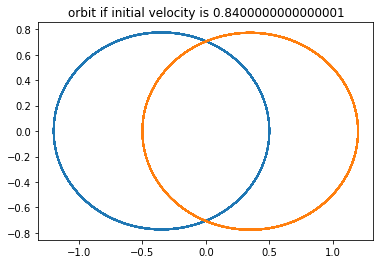

eccentricity is  0.4421686945165238


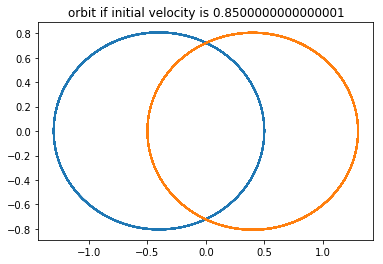

eccentricity is  0.4768664931311694


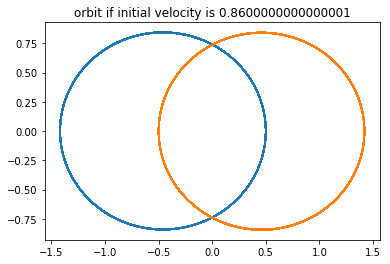

eccentricity is  0.5118626113152575


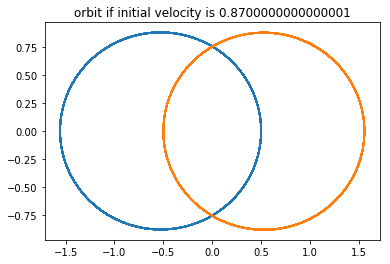

eccentricity is  0.547212970857161


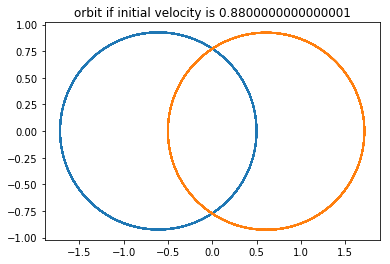

eccentricity is  0.5829200504099015


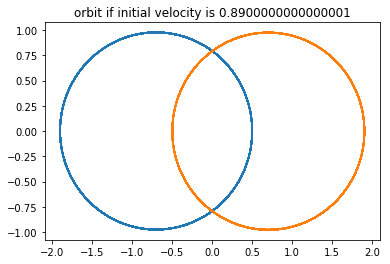

eccentricity is  0.6189909342308817


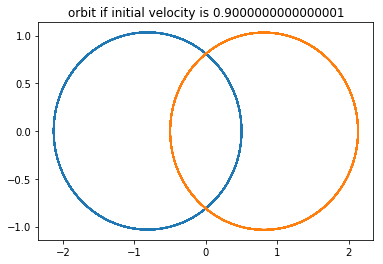

In [137]:
import numpy as np
import matplotlib.pyplot as plt

for x in np.arange(0.8,0.91,0.01):
    G=1.
    M1=1.
    M2 = 1.
    tend=2.*np.pi*100.
    h=0.01
    y=[0.5,0.,0.,x,-0.5,0,0,-x] #[x1,x1speed,y1,y1speed,x2,x2speed,y2,y2speed]
    t=0

    def f(t, y):
        f=np.zeros(8)
        r=np.sqrt((y[0]-y[4])*(y[0]-y[4])+(y[2]-y[6])*(y[2]-y[6]))
        f[0]=y[1]
        f[1]=G*M2/r/r/r*(y[4]-y[0])
        f[2]=y[3]
        f[3]=G*M2/r/r/r*(y[6]-y[2])
        f[4]=y[5]
        f[5]=G*M1/r/r/r*(y[0]-y[4])
        f[6]=y[7]
        f[7]=G*M1/r/r/r*(y[2]-y[6])
        return f
    
    def lf(t, h, y, n):
        # drift step
        fv=f(t, y)
        for i in [0,2,4,6]:
            y[i]+=fv[i]*h/2.
        # Please finish kick and drift step
        # kick step
        fv = f(t,y)
        for i in [1,3,5,7]:
            y[i] = y[i] + fv[i]*h
        # drift step
        fv = f(t,y)
        for i in [0,2,4,6]:
            y[i] = y[i] + fv[i]*h/2.
        return y

    x1p=[]
    y1p=[]
    x2p=[]
    y2p=[]
    ta=[]
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = lf(t,h,y,8)
        x1p=np.append(x1p,y[0])
        y1p=np.append(y1p,y[2])
        x2p=np.append(x2p,y[4])
        y2p=np.append(y2p,y[6])
        ta=np.append(ta,t)
        t = t+h
        
    a = max(x1p) - min(x1p)
    b = max(y1p) - min(y1p)
    e = np.sqrt(1 - b*b/(a*a))

    plt.plot(x1p,y1p)
    plt.plot(x2p,y2p)
    plt.title('orbit if initial velocity is %s' %x)
    plt.show()
    print('eccentricity is ',e)

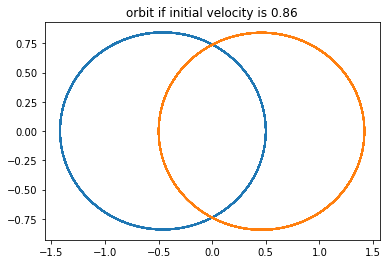

eccentricity is  0.47686649313115664


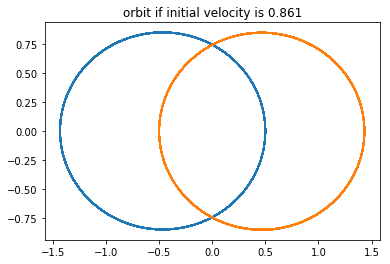

eccentricity is  0.4803281619051437


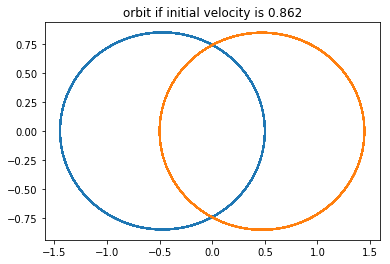

eccentricity is  0.4838368232508636


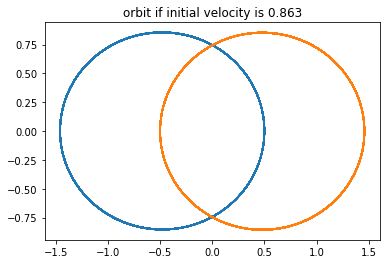

eccentricity is  0.4873088145747869


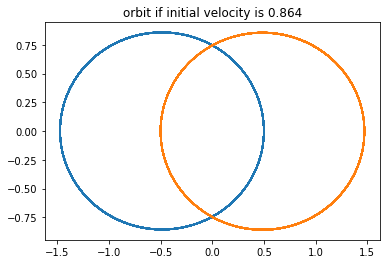

eccentricity is  0.49082435028807603


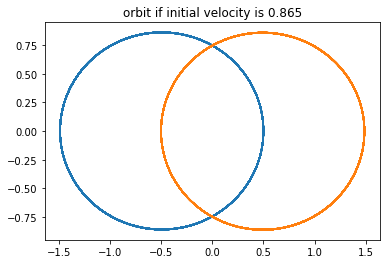

eccentricity is  0.49429884542211255


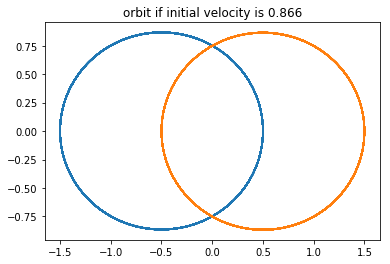

eccentricity is  0.4978220385900029


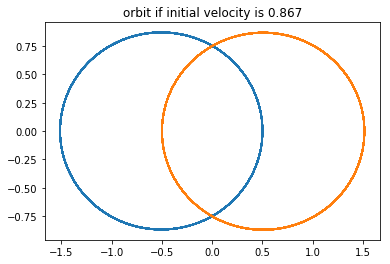

eccentricity is  0.5013048097213811


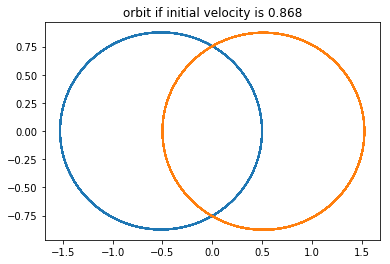

eccentricity is  0.5048342666706346


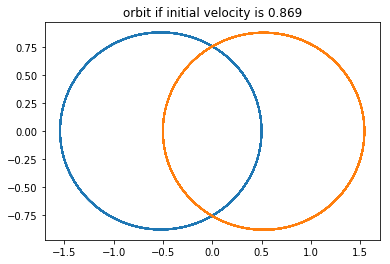

eccentricity is  0.5083262203101


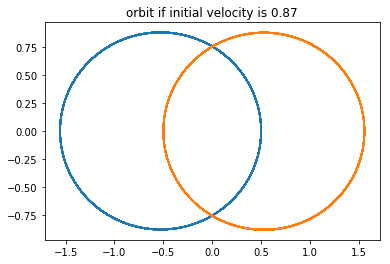

eccentricity is  0.5118626113152575


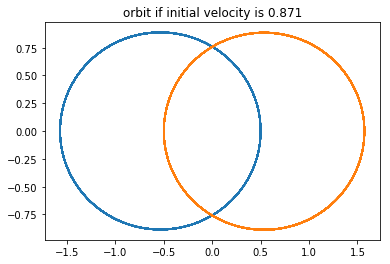

eccentricity is  0.5153623677178748


In [138]:
import numpy as np
import matplotlib.pyplot as plt

for x in np.arange(0.86,0.871,0.001):
    G=1.
    M1=1.
    M2 = 1.
    tend=2.*np.pi*100.
    h=0.01
    y=[0.5,0.,0.,x,-0.5,0,0,-x] #[x1,x1speed,y1,y1speed,x2,x2speed,y2,y2speed]
    t=0

    def f(t, y):
        f=np.zeros(8)
        r=np.sqrt((y[0]-y[4])*(y[0]-y[4])+(y[2]-y[6])*(y[2]-y[6]))
        f[0]=y[1]
        f[1]=G*M2/r/r/r*(y[4]-y[0])
        f[2]=y[3]
        f[3]=G*M2/r/r/r*(y[6]-y[2])
        f[4]=y[5]
        f[5]=G*M1/r/r/r*(y[0]-y[4])
        f[6]=y[7]
        f[7]=G*M1/r/r/r*(y[2]-y[6])
        return f
    
    def lf(t, h, y, n):
        # drift step
        fv=f(t, y)
        for i in [0,2,4,6]:
            y[i]+=fv[i]*h/2.
        # Please finish kick and drift step
        # kick step
        fv = f(t,y)
        for i in [1,3,5,7]:
            y[i] = y[i] + fv[i]*h
        # drift step
        fv = f(t,y)
        for i in [0,2,4,6]:
            y[i] = y[i] + fv[i]*h/2.
        return y

    x1p=[]
    y1p=[]
    x2p=[]
    y2p=[]
    ta=[]
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = lf(t,h,y,8)
        x1p=np.append(x1p,y[0])
        y1p=np.append(y1p,y[2])
        x2p=np.append(x2p,y[4])
        y2p=np.append(y2p,y[6])
        ta=np.append(ta,t)
        t = t+h
        
    a = max(x1p) - min(x1p)
    b = max(y1p) - min(y1p)
    e = np.sqrt(1 - b*b/(a*a))

    plt.plot(x1p,y1p)
    plt.plot(x2p,y2p)
    plt.title('orbit if initial velocity is %s' %x)
    plt.show()
    print('eccentricity is ',e)